In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Mon, 13 Jun 2022 12:46


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"28,356,427","31,743,453","3,387,026",11.94%
Arterial,"25,634,546","25,366,658","-267,888",-1.05%
Collector,"4,301,175","3,950,889","-350,286",-8.14%
Ramp,"753,376","632,889","-120,487",-15.99%
Total,"59,045,524","61,693,889","2,648,365",4.49%


#### Daily | By Facility Type - Pierce County

In [6]:
df1 = df[df['county'] == 'Pierce']

In [7]:
_df = df1.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"5,851,029","7,379,282","1,528,253",26.12%
Arterial,"7,076,525","7,377,351","300,826",4.25%
Collector,"764,627","708,385","-56,242",-7.36%
Ramp,"225,357","199,061","-26,296",-11.67%
Total,"13,917,538","15,664,079","1,746,541",12.55%


#### Daily | By Facility Type - Other Counties

In [8]:
df2 = df[df['county'] != 'Pierce']

In [9]:
_df = df2.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"22,505,398","24,364,171","1,858,773",8.26%
Arterial,"18,558,021","17,989,307","-568,714",-3.06%
Collector,"3,536,548","3,242,504","-294,044",-8.31%
Ramp,"528,019","433,828","-94,191",-17.84%
Total,"45,127,986","46,029,810","901,824",2.00%


----
### Daily | By County

In [10]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"31,186,220","33,002,460","1,816,240",5.82%
Kitsap,"4,557,863","3,865,621","-692,242",-15.19%
Pierce,"13,917,538","15,664,079","1,746,541",12.55%
Snohomish,"9,383,903","9,161,729","-222,174",-2.37%
Total,"59,045,524","61,693,889","2,648,365",4.49%


----
### Daily | Scatterplots 

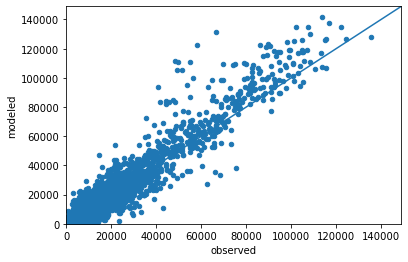

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9553415107811477


---
By County

King r^2: 0.9669248209845582
Kitsap r^2: 0.9563069679792374
Pierce r^2: 0.9517451699753132
Snohomish r^2: 0.9389327843781166


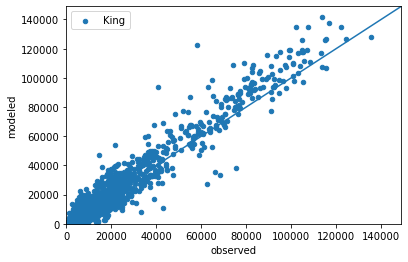

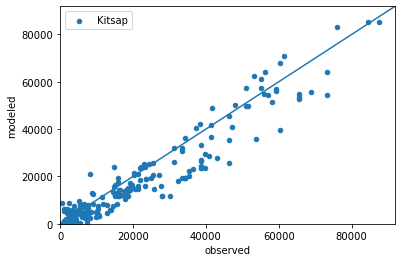

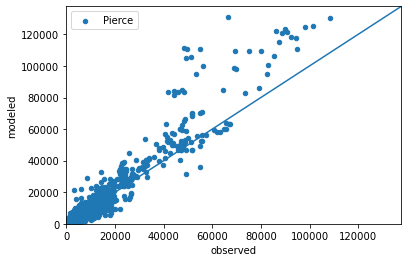

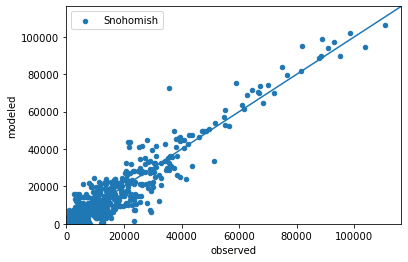

In [13]:
for county in np.unique(df['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9025530680037963
r^2 Arterial: 0.8485302518006246


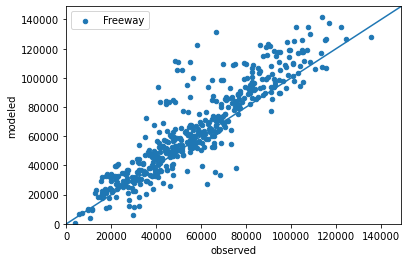

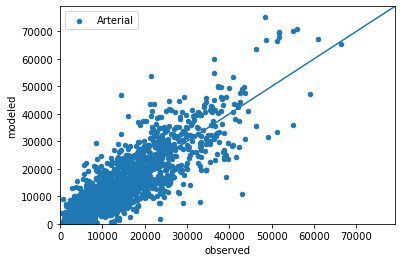

In [14]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - Pierce County

r^2 Freeway: 0.8140852498905548
r^2 Arterial: 0.8936829201478735


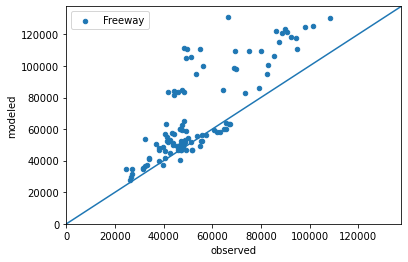

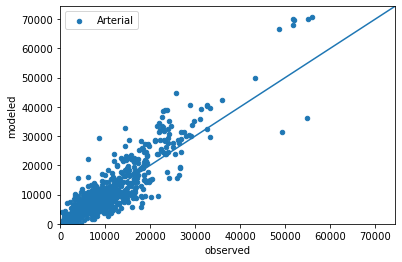

In [15]:
df1 = df[df['county'] == 'Pierce']
for factype in ['Freeway','Arterial']:
    _df = df1[df1['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - Other Counties

r^2 Freeway: 0.9341688904174456
r^2 Arterial: 0.8254882219980688


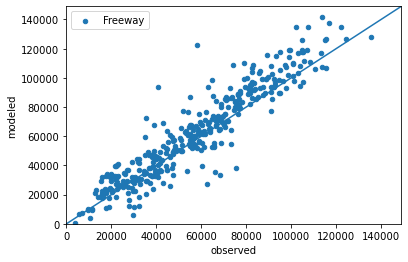

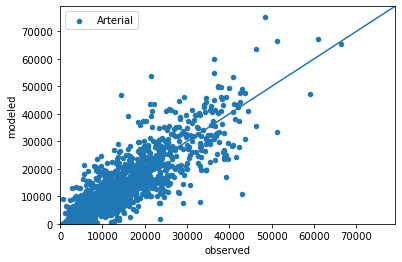

In [16]:
df2 = df[df['county'] != 'Pierce']
for factype in ['Freeway','Arterial']:
    _df = df2[df2['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.915111571197588


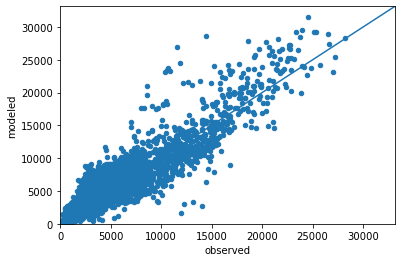

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - Pierce County**

r^2: 0.8725896257718012


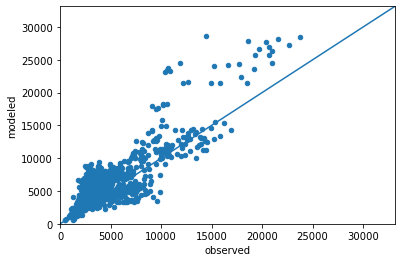

In [18]:
df1 = df[df['county'] == 'Pierce']
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - Other Counties**

r^2: 0.9306220947360416


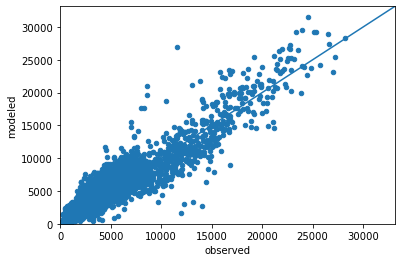

In [19]:
df2 = df[df['county'] != 'Pierce']
ax = df2.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [20]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","678,745",King,"110,328",19.41%
1,KENT,"550,322","607,698",King,"57,376",10.43%
2,SEATTLE - SOUTH OF CBD,"526,500","570,530",King,"44,030",8.36%
3,SHIP CANAL,"519,802","590,968",King,"71,166",13.69%
4,KIRKLAND-REDMOND,"414,120","406,597",King,"-7,523",-1.82%
5,MILL CREEK,"400,848","410,534",King,"9,686",2.42%
6,SOUTH BELLEVUE,"399,500","357,942",King,"-41,558",-10.40%
7,SEATTLE - NORTH,"372,000","399,559",King,"27,559",7.41%
8,TACOMA - EAST OF CBD,"312,164","432,505",Pierce,"120,341",38.55%
9,PARKLAND,"304,322","318,440",Pierce,"14,118",4.64%


r^2 : 0.9854817571053918


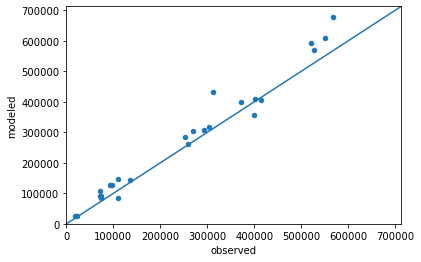

In [21]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - Pierce County

In [22]:
df1 = df[df['county'] == 'Pierce']
df1 = df1.append(df1.sum(numeric_only=True), ignore_index=True)
df1.at[df1.index[-1], 'name'] = 'TOTAL'
#df1.at['C', 'name'] = 10
df1['percent_diff'] = df1['diff']/df1['observed']
df1[['percent_diff']] = df1[['percent_diff']].applymap(format_percent)
df1

,name,observed,modeled,county,diff,percent_diff
0,TACOMA - EAST OF CBD,"312,164","432,505",Pierce,"120,341",38.55%
1,PARKLAND,"304,322","318,440",Pierce,"14,118",4.64%
2,PUYALLUP,"135,600","143,155",Pierce,"7,555",5.57%
3,TACOMA NARROWS,"96,000","127,757",Pierce,"31,757",33.08%
4,GIG HARBOR,"71,040","91,382",Pierce,"20,342",28.63%
5,TOTAL,"919,126","1,113,239",NaN,"194,113",21.12%


r^2 : 0.9639121209484031


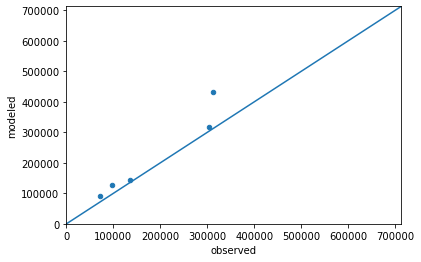

In [23]:
df1 = df1.head(-1)
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - Other Counties

In [24]:
df2 = df[df['county'] != 'Pierce']
df2 = df2.append(df2.sum(numeric_only=True), ignore_index=True)
df2.at[df2.index[-1], 'name'] = 'TOTAL'
#df2.at['C', 'name'] = 10
df2['percent_diff'] = df2['diff']/df2['observed']
df2[['percent_diff']] = df2[['percent_diff']].applymap(format_percent)
df2

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","678,745",King,"110,328",19.41%
1,KENT,"550,322","607,698",King,"57,376",10.43%
2,SEATTLE - SOUTH OF CBD,"526,500","570,530",King,"44,030",8.36%
3,SHIP CANAL,"519,802","590,968",King,"71,166",13.69%
4,KIRKLAND-REDMOND,"414,120","406,597",King,"-7,523",-1.82%
5,MILL CREEK,"400,848","410,534",King,"9,686",2.42%
6,SOUTH BELLEVUE,"399,500","357,942",King,"-41,558",-10.40%
7,SEATTLE - NORTH,"372,000","399,559",King,"27,559",7.41%
8,BOTHELL,"293,729","307,224",King,"13,495",4.59%
9,LYNNWOOD-BOTHELL,"269,900","302,581",King,"32,681",12.11%


r^2 : 0.9892269843103683


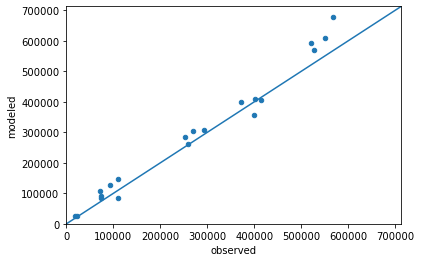

In [25]:
df2 = df2.head(-1)
ax = df2.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
sorted_values = df.sort_values('observed_5to20', ascending=False).agency.to_list() + ['TOTAL']
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'agency'] = 'TOTAL'
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.set_index('agency').reindex(sorted_values)

,county,observed_5to20,modeled_5to20,diff,perc_diff
agency,,,,,
King County Metro,NaN,"391,187","380,331","-10,856",-2.78%
Sound Transit,NaN,"145,426","142,950","-2,476",-1.70%
Community Transit,NaN,"30,918","26,797","-4,121",-13.33%
Pierce Transit,Pierce,"27,233","33,383","6,150",22.58%
Washington Ferries,NaN,"16,912","12,497","-4,414",-26.10%
Kitsap Transit,NaN,"8,624","11,432","2,808",32.56%
Everett Transit,NaN,"3,290","1,676","-1,614",-49.05%
TOTAL,NaN,"623,590","609,066","-14,523",-37.82%


----
### Key Routes
#### Ferries

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
sorted_values = _df.sort_values('observed_5to20', ascending=False).description.to_list() + ['TOTAL']
_df = _df.append(_df.sum(numeric_only=True), ignore_index=True)
_df.at[_df.index[-1], 'description'] = 'TOTAL'
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
0,POF Seattle - West S,NaN,"1,356",599,-757,-55.82%
1,POF Seattle - Vashon,NaN,670,461,-208,-31.10%
2,WSF Kingston - Edmon,NaN,"1,732",501,"-1,231",-71.06%
3,WSF Bainbridge Islan,NaN,"8,857","9,073",216,2.44%
4,WSF Bremerton - Seat,NaN,"4,484","1,338","-3,147",-70.17%
5,WSF Fauntleroy - Sou,NaN,365,24,-342,-93.50%
6,WSF Vashon Island -,NaN,946,"1,035",89,9.40%
7,WSF Southworth - Vas,NaN,239,255,16,6.84%
8,WSF Point Defiance -,NaN,289,272,-17,-5.75%
9,TOTAL,0,"18,937","13,558","-5,379",-308.73%


r^2 : 0.9710343122532626


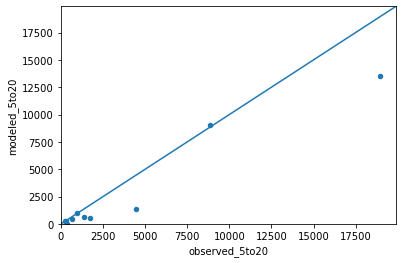

In [28]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [29]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
0,1973,POF West Seattle - S,994
4,4202,POF Bremerton - Anna,847
1,1975,POF Vashon Island -,803
3,4201,POF Bremerton - Pt O,760
2,4200,POF Seattle - Bremer,683
7,5003,WSF Bremerton - Seat,553
8,5005,WSF Vashon Island -,334
9,5006,WSF Southworth - Vas,292
10,5007,WSF Point Defiance -,287
6,5002,WSF Bainbridge Islan,270


#### Rail

In [30]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,NaN,"69,383","65,079","-4,304",-6.20%
1,Sounder South,NaN,"15,356","15,929",573,3.73%
2,Sounder North,NaN,"1,667","2,147",481,28.83%


r^2 : 0.999847082199155


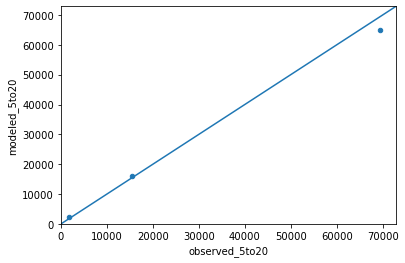

In [31]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [32]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,NaN,"15,336","15,328",-8,-0.05%
4,C Line RapidRide,NaN,"11,368","12,699","1,331",11.71%
1,KC Metro 40,NaN,"11,405","12,056",651,5.70%
0,KC Metro 7,NaN,"10,150","10,585",435,4.29%
10,Sound Transit 550,NaN,"9,168","10,443","1,275",13.91%
5,D Line RapidRide,NaN,"13,078","9,672","-3,406",-26.05%
2,A Line RapidRide,NaN,"8,522","6,999","-1,523",-17.87%
7,F Line RapidRide,NaN,"5,267","6,136",869,16.49%
3,B Line RapidRide,NaN,"5,914","5,889",-25,-0.43%
8,SLU Streetcar,NaN,"1,703","1,336",-367,-21.56%


r^2 : 0.9399341193961159


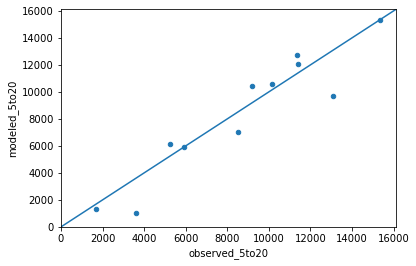

In [33]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.8906923720519028
r^2 Everett Transit: -0.3723263732525582
r^2 King County Metro: 0.9311336228148167
r^2 Kitsap Transit: 0.7579562165055089
r^2 Pierce Transit: 0.8714379322446267
r^2 Sound Transit: 0.9957866630096703
r^2 Washington Ferries: 0.9296828076638296


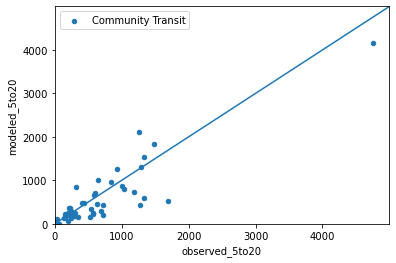

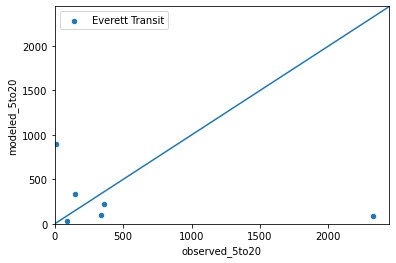

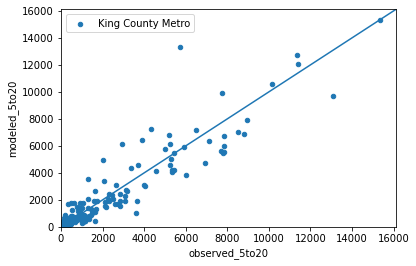

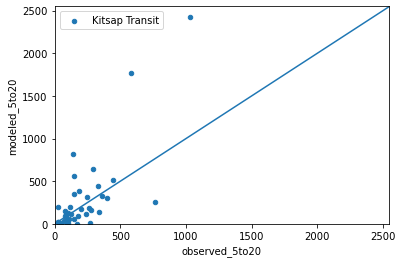

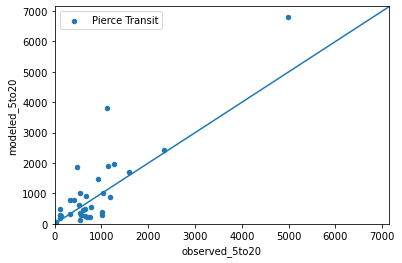

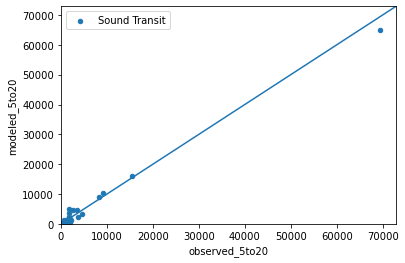

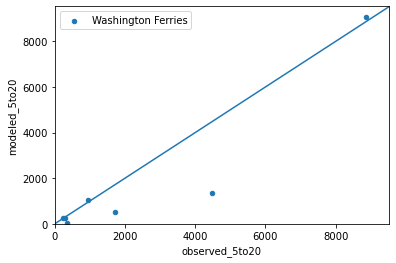

In [34]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
        lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [35]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,county,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,,
Husky Stadium,NaN,"9,416","9,457",41,0.44%
Westlake,NaN,"10,904","6,665","-4,238",-38.87%
University St,NaN,"5,257","5,974",717,13.63%
Pioneer Square,NaN,"3,865","5,524","1,659",42.92%
Int'l District,NaN,"5,647","2,576","-3,072",-54.39%
Capitol Hill,NaN,"7,016","7,235",219,3.12%
Stadium,NaN,"1,912",924,-988,-51.69%
SODO,NaN,"2,108","3,267","1,159",55.01%
Beacon Hill,Pierce,"2,587","2,200",-387,-14.97%


Sound Transit Station Groupings

In [36]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","9,457",41,0.44%
Capitol Hill,"7,016","7,235",219,3.12%
Westlake/University St,"16,161","12,639","-3,522",-21.79%
Pioneer Square/Int'l District,"9,512","8,099","-1,413",-14.86%
Stadium/SODO,"4,020","4,191",171,4.25%
Beacon Hill/Mount Baker,"4,809","4,635",-175,-3.64%
Columbia City,"2,376","2,574",198,8.34%
Othello/Rainier Beach,"4,412","5,161",749,16.97%
Tukwila Int'l Blvd,"2,779","3,269",490,17.62%


# Stop Transfers

### Light Rail

In [37]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,county,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,,
Husky Stadium,NaN,0.39,-99.00,99.39,-100.39%
Westlake,NaN,0.27,0.36,-0.10,-26.12%
University St,NaN,0.51,0.20,0.31,155.34%
Pioneer Square,NaN,0.43,0.16,0.27,169.58%
Int'l District,NaN,0.59,0.45,0.14,31.78%
Capitol Hill,NaN,0.06,-99.00,99.06,-100.06%
Stadium,NaN,0.28,0.12,0.16,131.81%
SODO,NaN,0.41,0.31,0.10,32.35%
Beacon Hill,Pierce,0.34,0.35,-0.01,-3.50%


# Externals

In [38]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","120,040","-9,960",-7.66%
I-5 to Mount Vernon,3744,Snohomish,"67,000","52,607","-14,393",-21.48%
I-90 @ Snoqualmie Pass,3739,King,"33,000","26,295","-6,705",-20.32%
SR-532 to Camano Island,3746,Snohomish,"23,000","19,042","-3,958",-17.21%
SR-507 to Yelm,3734,Pierce,"23,000","18,235","-4,765",-20.72%
SR-3 to Belfair,3749,Kitsap,"18,000","15,112","-2,888",-16.04%
Hood Canal Bridge,3748,Kitsap,"18,000","15,286","-2,714",-15.08%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","7,940","-1,160",-12.74%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","5,477",-823,-13.07%


#### Externals - Pierce County

In [39]:
df1 = df[df['county'] == 'Pierce']
pd.options.display.float_format = '{:0,.0f}'.format
df1 = df1.drop('diff', axis=1)
df1['diff'] = df1['modeled']-df1['observed']
df1 = df1.fillna(0)
df1.loc['Total',['observed','modeled','diff']] = df1[['observed','modeled','diff']].sum()
df1['percent_diff'] = df1['diff']/df1['observed']
df1[['percent_diff']] = df1[['percent_diff']].applymap(format_percent)

#df1[['external_station']] = df1[['external_station']].applymap('{:0.0f}'.format)
df1.replace('nan', '', regex=True)

,external_station,county,observed,modeled,percent_diff,diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","120,040",-7.66%,"-9,960"
SR-507 to Yelm,3734,Pierce,"23,000","18,235",-20.72%,"-4,765"
SR-302 to Shelton,3750,Pierce,"4,100","3,980",-2.94%,-120
SR-7 to Morton,3735,Pierce,"2,700","1,987",-26.41%,-713
SR-706 to Longmire,3736,Pierce,"1,800","1,789",-0.60%,-11
SR-123 S/O Cayuse Pass,3737,Pierce,"1,100",522,-52.58%,-578
SR 410 E/O Cayuse Pass,3738,Pierce,960,519,-45.95%,-441
Total,NaN,NaN,"163,660","147,071",-10.14%,"-16,589"


#### Externals - Other Counties

In [40]:
df2 = df[df['county'].isin(['Snohomish', 'Kitsap', 'King'])]
pd.options.display.float_format = '{:0,.0f}'.format
df2 = df2.drop('diff', axis=1)
df2['diff'] = df2['modeled']-df2['observed']
df2 = df2.fillna(0)
df2.loc['Total',['observed','modeled','diff']] = df2[['observed','modeled','diff']].sum()
df2['percent_diff'] = df2['diff']/df2['observed']
df2[['percent_diff']] = df2[['percent_diff']].applymap(format_percent)

#df2[['external_station']] = df2[['external_station']].applymap('{:0.0f}'.format)
df2.replace('nan', '', regex=True)

,external_station,county,observed,modeled,percent_diff,diff
location,,,,,,
I-5 to Mount Vernon,3744,Snohomish,"67,000","52,607",-21.48%,"-14,393"
I-90 @ Snoqualmie Pass,3739,King,"33,000","26,295",-20.32%,"-6,705"
SR-532 to Camano Island,3746,Snohomish,"23,000","19,042",-17.21%,"-3,958"
SR-3 to Belfair,3749,Kitsap,"18,000","15,112",-16.04%,"-2,888"
Hood Canal Bridge,3748,Kitsap,"18,000","15,286",-15.08%,"-2,714"
SR-530 N/O Stanwood,3745,Snohomish,"9,100","7,940",-12.74%,"-1,160"
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","5,477",-13.07%,-823
SR-2 @ Stevens Pass,3740,King,"5,600","2,890",-48.40%,"-2,710"
SR-530 N/O Darrington,3742,Snohomish,"1,600","1,056",-34.03%,-544


# Corridor Speed

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

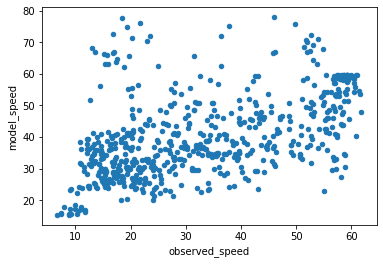

In [41]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

## Pierce County

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

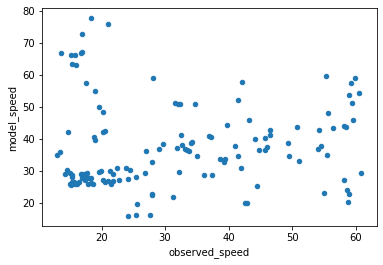

In [42]:
df.loc[df.county=='Pierce'].plot(kind='scatter', y='model_speed', x='observed_speed')

## Other Counties

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

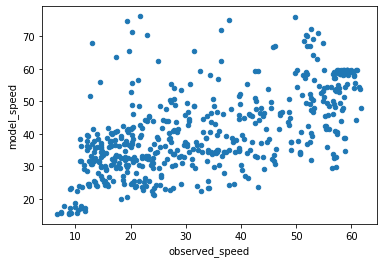

In [43]:
_df = df.loc[df.county!='Pierce']
_df = _df.groupby(['Corridor_Number', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda xdf: xdf.length*60/xdf.auto_time)
_df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

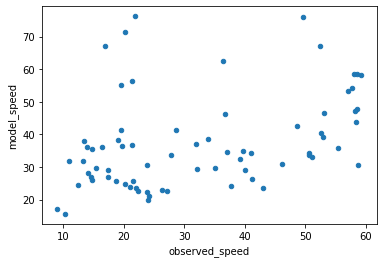

In [44]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [45]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,48,58
15,Everett to Seattle - SB,23,27
24,Tacoma to Seattle - NB,20,24
33,Seattle to Tacoma - SB,31,59
42,Bellevue to Lynnwood - NB,53,57
51,Lynnwood to Bellevue - SB,24,22
60,Tukwila to Bellevue - NB,25,20
69,Bellevue to Tukwila - SB,24,43
78,Auburn to Renton - NB,23,22
87,Renton to Auburn - SB,36,56


## Pierce County

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

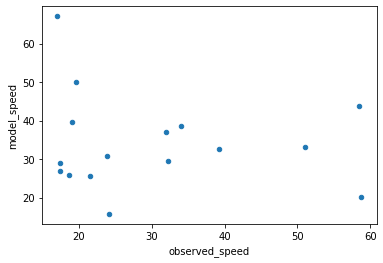

In [46]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county=='Pierce']
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [47]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
49,Tacoma to Seattle - NB,16,24
67,Seattle to Tacoma - SB,20,59
400,"SR 161, SR 18 to 264th St - SB",40,19
547,"SR 512, SR 167 to I-5 - WB",33,39
556,"SR 512, I-5 to SR 167 - EB",30,32
565,"SR 16, I-5 to Purdy Dr - WB",44,58
574,"SR 16, Purdy Dr to I-5 - EB",33,51
583,"56th Street/Cirque, Alaska to Bridgeport - WB",67,17
592,"19th Street, Bridgeport to Jefferson - EB",26,19
601,"74th/72nd/Pioneer, Meridian to Lakewood - WB",27,17


## Other Counties

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

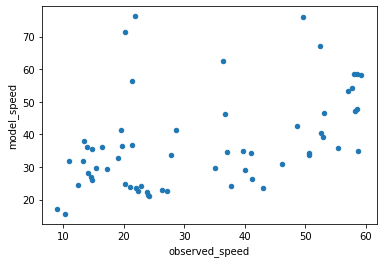

In [48]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county!='Pierce']
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [49]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,48,58
15,Everett to Seattle - SB,23,27
24,Tacoma to Seattle - NB,21,24
33,Seattle to Tacoma - SB,35,59
42,Bellevue to Lynnwood - NB,53,57
51,Lynnwood to Bellevue - SB,24,22
60,Tukwila to Bellevue - NB,25,20
69,Bellevue to Tukwila - SB,24,43
78,Auburn to Renton - NB,23,22
87,Renton to Auburn - SB,36,56


### PM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

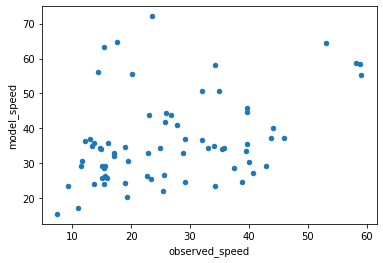

In [50]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [51]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,26,23
10,Everett to Seattle - SB,41,28
19,Tacoma to Seattle - NB,29,43
28,Seattle to Tacoma - SB,22,25
37,Bellevue to Lynnwood - NB,27,26
46,Lynnwood to Bellevue - SB,46,40
55,Tukwila to Bellevue - NB,25,29
64,Bellevue to Tukwila - SB,24,19
73,Auburn to Renton - NB,37,44
82,Renton to Auburn - SB,23,34


## Pierce County

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

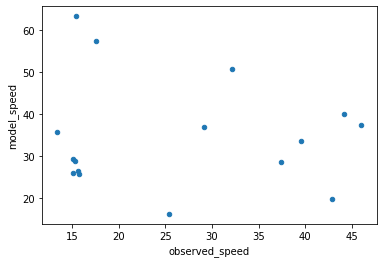

In [52]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county=='Pierce']
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [53]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
39,Tacoma to Seattle - NB,20,43
57,Seattle to Tacoma - SB,16,25
390,"SR 161, SR 18 to 264th St - SB",36,13
542,"SR 512, SR 167 to I-5 - WB",29,37
551,"SR 512, I-5 to SR 167 - EB",34,40
560,"SR 16, I-5 to Purdy Dr - WB",37,46
569,"SR 16, Purdy Dr to I-5 - EB",40,44
578,"56th Street/Cirque, Alaska to Bridgeport - WB",63,15
587,"19th Street, Bridgeport to Jefferson - EB",26,16
596,"74th/72nd/Pioneer, Meridian to Lakewood - WB",26,16


## Other Counties

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

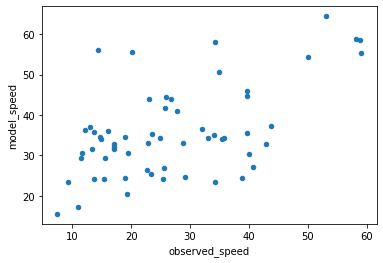

In [54]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county!='Pierce']
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [55]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,26,23
10,Everett to Seattle - SB,41,28
19,Tacoma to Seattle - NB,33,43
28,Seattle to Tacoma - SB,24,25
37,Bellevue to Lynnwood - NB,27,26
46,Lynnwood to Bellevue - SB,46,40
55,Tukwila to Bellevue - NB,25,29
64,Bellevue to Tukwila - SB,24,19
73,Auburn to Renton - NB,37,44
82,Renton to Auburn - SB,23,34
